## Implementation of Logistic Regression using Regularization method

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('Logistic_X_Train.csv').values
Y_train = pd.read_csv('Logistic_Y_Train.csv').values
X_test = pd.read_csv('Logistic_X_Test.csv').values

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [3]:
def hypothesis(X, theta):
    val = np.dot(X, theta)
    val = 1/(1+np.exp(-1*val))
    return val.reshape((-1, 1))

def gradient(X, Y, theta, reg_factor):
    h = hypothesis(X, theta)
    grad = np.dot(X.T, h-Y)
    
    grad[1:] += reg_factor * theta[1:]
    return grad/X.shape[0]

def loss(X, Y, theta, reg_factor):
    e1 = e2 = 0.0
    (m, n) = X.shape
    h = hypothesis(X, theta)
    e1 = -( (Y*np.log2(h)) + ((1-Y)*np.log2(1-h)) )
    
    e2 = reg_factor * np.square(theta[1:])
    return (e1.sum() + e2.sum())/m
        
def grad_desc(X, Y, lr=0.1, max_itr=400, reg_factor=100):
    theta = np.zeros((X.shape[1], 1))
    error = []
    for i in range(max_itr):
        grad = gradient(X, Y, theta, reg_factor)
        theta = theta - lr*grad
        error.append(loss(X, Y, theta, reg_factor))
    return theta, error

def predict(X, theta):
    val = hypothesis(X, theta)
    val = (val >= 0.5).astype('int8')
    return val

[[-0.79850665]
 [-1.35013754]
 [ 0.68591467]
 [-1.33836235]]


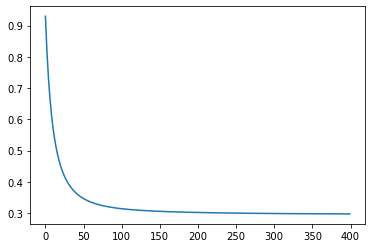

In [4]:
theta, error = grad_desc(X_train, Y_train)
print(theta)
plt.plot(error)
plt.show()

In [5]:
y_pred = predict(X_test, theta)
pd.DataFrame(y_pred, columns=['label']).to_csv('pred.csv', index=False)